<a href="https://colab.research.google.com/github/redadmiral/python-for-journalists/blob/main/exercises/ProbleklausurBlockSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probeklausur Python für Journalist*innen Wise 24/25

Wenn du KI-Tools für die Lösung verwendest, dann gib stets deinen Prompt mit an. Jedes mit KI-generiertem Code erzielte Ergebnis muss für die volle Punktzahl mit einem weiteren Prompt überprüft werden. Der Kontroll-Prompt muss einen anderen Lösungsweg nutzen als der erste Prompt.

1. Lade den Datensatz in die Umgebung: https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001/download/KUL100OD1001.csv


In [17]:
# prompt: Lade den Datensatz direkt mit pandas in die Umgebung: https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv Stelle die ersten zeilen mit head() dar. Stelle ein, dass bei der ausgabe mit head() keine Spalten ausgelassen werden.

import pandas as pd

# Lade den Datensatz direkt mit pandas in die Umgebung
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit() # Stop execution if the file can't be loaded


# Stelle die ersten Zeilen mit head() dar und stelle ein, dass keine Spalten ausgelassen werden
pd.set_option("display.max_columns", None)  # Zeige alle Spalten
df.head()

,StichtagDatJahr,DatenstandCd,HalterId,AlterV10Cd,AlterV10Lang,AlterV10Sort,SexCd,SexLang,SexSort,KreisCd,KreisLang,KreisSort,QuarCd,QuarLang,QuarSort,Rasse1Text,Rasse2Text,RasseMischlingCd,RasseMischlingLang,RasseMischlingSort,RassentypCd,RassentypLang,RassentypSort,GebDatHundJahr,AlterVHundCd,AlterVHundLang,AlterVHundSort,SexHundCd,SexHundLang,SexHundSort,HundefarbeText,AnzHunde
0,2015,D,126,60,60- bis 69-Jährige,7,1,männlich,1,9,Kreis 9,9,92,Altstetten,92,Welsh Terrier,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2011,3,3-Jährige,3,2,weiblich,2,schwarz/braun,1
1,2015,D,574,60,60- bis 69-Jährige,7,2,weiblich,2,2,Kreis 2,2,23,Leimbach,23,Cairn Terrier,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2002,12,12-Jährige,12,2,weiblich,2,brindle,1
2,2015,D,695,40,40- bis 49-Jährige,5,1,männlich,1,6,Kreis 6,6,63,Oberstrass,63,Labrador Retriever,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2012,2,2-Jährige,2,2,weiblich,2,braun,1
3,2015,D,893,60,60- bis 69-Jährige,7,2,weiblich,2,7,Kreis 7,7,71,Fluntern,71,Mittelschnauzer,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2010,4,4-Jährige,4,2,weiblich,2,schwarz,1
4,2015,D,1177,50,50- bis 59-Jährige,6,1,männlich,1,10,Kreis 10,10,102,Wipkingen,102,Shih Tzu,Keine,1,Rassehund,1,K,Kleinwüchsig,1,2011,3,3-Jährige,3,1,männlich,1,schwarz/weiss,1


In [18]:
# prompt: Führe eine explorative Analyse durch. Welche Wertebereiche haben die Spalten? Welche Werte könnten für Missing Values stehen? Gibt es Ausreißer?

import pandas as pd

# Lade den Datensatz direkt mit pandas in die Umgebung
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit() # Stop execution if the file can't be loaded

# Wertebereiche der Spalten
print("Wertebereiche der Spalten:")
for col in df.columns:
  print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")
  print(f"  Datentyp: {df[col].dtype}") # Hinzufügen des Datentyps

# Potenzielle Missing Values
print("\nPotenzielle Missing Values (Häufigkeit):")
for col in df.columns:
    print(f"{col}:")
    print(df[col].value_counts(dropna=False)) # Zeigt alle Werte und deren Häufigkeiten an, einschliesslich NaN

# Ausreißeranalyse (Beispiel mit Quantilen)
print("\nAusreißeranalyse (mit Quantilen):")

numeric_cols = df.select_dtypes(include=['number'])  # Filter for numeric columns

for col in numeric_cols.columns:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  print(f"Ausreißer in Spalte {col}:")
  print(outliers[[col]])  # Display only the column with outliers
  print("-" * 20)

# Weitere Ausreißerprüfung (z.B. Boxplots) könnte mit einem Plot erfolgen. Da dies in der Aufgabenstellung nicht explizit gefordert ist, wurde dies der Vollständigkeit halber in Kommentaren hinzugefügt.
#  import matplotlib.pyplot as plt
#  df.boxplot(column=numeric_cols)
# plt.show()

Wertebereiche der Spalten:
StichtagDatJahr: Min = 2015, Max = 2024
  Datentyp: int64
DatenstandCd: Min = D, Max = P
  Datentyp: object
HalterId: Min = 126, Max = 166003
  Datentyp: int64
AlterV10Cd: Min = 10, Max = 999
  Datentyp: int64
AlterV10Lang: Min = 10- bis 19-Jährige, Max = Unbekannt
  Datentyp: object
AlterV10Sort: Min = 2, Max = 99
  Datentyp: int64
SexCd: Min = 1, Max = 2
  Datentyp: int64
SexLang: Min = männlich, Max = weiblich
  Datentyp: object
SexSort: Min = 1, Max = 2
  Datentyp: int64
KreisCd: Min = 1, Max = 99
  Datentyp: int64
KreisLang: Min = Kreis 1, Max = Unbekannt (Stadt Zürich)
  Datentyp: object
KreisSort: Min = 1, Max = 13
  Datentyp: int64
QuarCd: Min = 10, Max = 999
  Datentyp: int64
QuarLang: Min = Affoltern, Max = Wollishofen
  Datentyp: object
QuarSort: Min = 10, Max = 999
  Datentyp: int64
Rasse1Text: Min = $Labradoodle$, Max = Zwergspitz
  Datentyp: object
Rasse2Text: Min = Aidi (Atlas Berghund), Max = Zwergspitz
  Datentyp: object
RasseMischlingCd: Min

1.1 Beschreibe mit deinen eigenen Worten welche Daten in dem Datensatz erfasst sind. Erstelle einen detaillierten Steckbrief für die ersten fünf Spalten.

Der Datensatz führt auf, welcher Halter in welchem Jahr welche Hunde gehalten hat. Im Datensatz ist das Geschlecht und Alter des Halters aufgeführt sowie der Wohnort als Kreis und Quartiert aufgeführt. Für die Hunde ist die Rasse und das Alter aufgeführt sowie die Farbe des Hundes. Die Rasse ist weiter unterteilt. Für Hund und Halter ist das Geburtsjahr angegeben.

Der Datensatz ist nach Jahren strukturiert. Der gleiche Hund wird in mehreren Jahren geführt.

```
Prompt: Gib mir eine Zusammenfassung der ersten fünf Spalten. Geh dabei genau darauf ein, welche Wertebereiche angegeben sind und um welchen Datentyp es sich handelt.
```

## StichtagDatJahr (Datentyp: Kategoriell):

Enthält das Jahr des Stichtags, an dem die Daten erhoben wurden.
Wertebereich: 2015 bis 2024.
Beispielwerte: 2015, 2020, 2024.
Keine fehlenden Werte (Anzahl: 80.788).

## DatenstandCd (Datentyp: Kategoriell):

Gibt den Stand der Daten an.
Mögliche Werte: 'D' und 'P'.
'D' ist der häufigste Wert mit 70.967 Einträgen.

'D': Steht für "definitiv".
'P': Steht für "provisorisch".

## HalterId (Datentyp: Kategoriell):

Eine eindeutige Identifikationsnummer für die Halter.
Wertebereich: 126 bis 166.003.
Beispielwerte: 126, 574, 121.862.
Keine fehlenden Werte.

## AlterV10Cd (Datentyp: Numerisch):

Altersgruppe des Halters in Codierung.
Wertebereich: 10 bis 999. Der Wert 999 steht für "Unbekannt".
Häufige Werte: 30, 40, 60.
AlterV10Lang (Datentyp: object):

## Altersgruppe des Halters als Text (Kategoriell).

Mögliche Werte:
"10- bis 19-Jährige", "30- bis 39-Jährige", …, "90- bis 99-Jährige".
"Unbekannt" ist ebenfalls vorhanden.
Häufigste Kategorie: "30- bis 39-Jährige" mit 18.275 Einträgen.

1.2 Wie sind in dem Datensatz fehlende Werte gespeichert?

Fehlende Werte sind als "Unbekannt" oder als 999 oder 9999 gespeichert.

1.3 Ersetze fehlende Werte durch pd.NA.

In [20]:
# prompt: Ersetze fehlende Werte im Datensatz durch pd.NA. Fehlende Werte sind als "Unbekannt", "Unbekannt (Stadt Zürich)" oder als 999 oder 9999 gespeichert. Gib danach alle zeilen zurück (maximal jedoch 25), die ein pd.NA enthalten.

import pandas as pd

# Lade den Datensatz (der Code zum Laden des Datensatzes bleibt unverändert)
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit()

# Ersetze die fehlenden Werte durch pd.NA
missing_values = ["Unbekannt", "Unbekannt (Stadt Zürich)", 999, 9999]
df = df.replace(missing_values, pd.NA)

# Gib die ersten 25 Zeilen mit pd.NA aus
df[df.isna().any(axis=1)].head(25)

,StichtagDatJahr,DatenstandCd,HalterId,AlterV10Cd,AlterV10Lang,AlterV10Sort,SexCd,SexLang,SexSort,KreisCd,KreisLang,KreisSort,QuarCd,QuarLang,QuarSort,Rasse1Text,Rasse2Text,RasseMischlingCd,RasseMischlingLang,RasseMischlingSort,RassentypCd,RassentypLang,RassentypSort,GebDatHundJahr,AlterVHundCd,AlterVHundLang,AlterVHundSort,SexHundCd,SexHundLang,SexHundSort,HundefarbeText,AnzHunde
9,2015,D,4215,40,40- bis 49-Jährige,5,2,weiblich,2,8,Kreis 8,8,81,Seefeld,81,Bergamasker,<NA>,3,"Mischling, sekundäre Rasse unbekannt",3,I,Rassentypenliste I,2,2001,13,13-Jährige,13,2,weiblich,2,grau/braun,1
10,2015,D,4215,40,40- bis 49-Jährige,5,2,weiblich,2,8,Kreis 8,8,81,Seefeld,81,Bergamasker,<NA>,3,"Mischling, sekundäre Rasse unbekannt",3,I,Rassentypenliste I,2,2004,10,10-Jährige,10,2,weiblich,2,schwarz,1
11,2015,D,4215,40,40- bis 49-Jährige,5,2,weiblich,2,8,Kreis 8,8,81,Seefeld,81,Border Collie,<NA>,3,"Mischling, sekundäre Rasse unbekannt",3,I,Rassentypenliste I,2,2001,13,13-Jährige,13,1,männlich,1,schwarz,1
12,2015,D,4239,60,60- bis 69-Jährige,7,2,weiblich,2,10,Kreis 10,10,102,Wipkingen,102,Pinscher,<NA>,3,"Mischling, sekundäre Rasse unbekannt",3,K,Kleinwüchsig,1,2013,1,1-Jährige,1,2,weiblich,2,braun/schwarz,1
18,2015,D,4726,50,50- bis 59-Jährige,6,1,männlich,1,5,Kreis 5,5,52,Escher Wyss,52,<NA>,<NA>,4,"Mischling, beide Rassen unbekannt",4,I,Rassentypenliste I,2,2007,7,7-Jährige,7,1,männlich,1,schwarz,1
23,2015,D,4908,50,50- bis 59-Jährige,6,1,männlich,1,5,Kreis 5,5,51,Gewerbeschule,51,<NA>,<NA>,4,"Mischling, beide Rassen unbekannt",4,K,Kleinwüchsig,1,1999,15,15-Jährige,15,2,weiblich,2,hellbraun,1
24,2015,D,4908,50,50- bis 59-Jährige,6,1,männlich,1,5,Kreis 5,5,51,Gewerbeschule,51,<NA>,<NA>,4,"Mischling, beide Rassen unbekannt",4,K,Kleinwüchsig,1,2000,14,14-Jährige,14,1,männlich,1,schwarz/braun/weiss,1
27,2015,D,5225,<NA>,<NA>,99,1,männlich,1,3,Kreis 3,3,34,Sihlfeld,34,Lagotto Romagnolo,Keine,1,Rassehund,1,I,Rassentypenliste I,2,2007,7,7-Jährige,7,1,männlich,1,braun,1
36,2015,D,6364,<NA>,<NA>,99,1,männlich,1,99,<NA>,13,<NA>,<NA>,<NA>,Appenzeller Sennenhund,Border Collie,2,"Mischling, beide Rassen bekannt",2,I,Rassentypenliste I,2,2013,1,1-Jährige,1,1,männlich,1,tricolor,1
39,2015,D,6600,50,50- bis 59-Jährige,6,1,männlich,1,6,Kreis 6,6,63,Oberstrass,63,<NA>,<NA>,4,"Mischling, beide Rassen unbekannt",4,K,Kleinwüchsig,1,2004,10,10-Jährige,10,1,männlich,1,braun,1


## Analyse

2.1 Welche Hunderasse ist die häufigste im Quartier Altstetten?

In [21]:
# prompt: Welche Hunderasse ist die häufigste im Quartier Altstetten?
# Der Datensatz ist wie folgt strukturiert:
# StichtagDatJahr	DatenstandCd	HalterId	AlterV10Cd	AlterV10Lang	AlterV10Sort	SexCd	SexLang	SexSort	KreisCd	KreisLang	KreisSort	QuarCd	QuarLang	QuarSort	Rasse1Text	Rasse2Text	RasseMischlingCd	RasseMischlingLang	RasseMischlingSort	RassentypCd	RassentypLang	RassentypSort	GebDatHundJahr	AlterVHundCd	AlterVHundLang	AlterVHundSort	SexHundCd	SexHundLang	SexHundSort	HundefarbeText	AnzHunde
# 0	2015	D	126	60	60- bis 69-Jährige	7	1	männlich	1	9	Kreis 9	9	92	Altstetten	92	Welsh Terrier	Keine	1	Rassehund	1	K	Kleinwüchsig	1	2011	3	3-Jährige	3	2	weiblich	2	schwarz/braun	1
# 1	2015	D	574	60	60- bis 69-Jährige	7	2	weiblich	2	2	Kreis 2	2	23	Leimbach	23	Cairn Terrier	Keine	1	Rassehund	1	K	Kleinwüchsig	1	2002	12	12-Jährige	12	2	weiblich	2	brindle	1
# 2	2015	D	695	40	40- bis 49-Jährige	5	1	männlich	1	6	Kreis 6	6	63	Oberstrass	63	Labrador Retriever	Keine	1	Rassehund	1	I	Rassentypenliste I	2	2012	2	2-Jährige	2	2	weiblich	2	braun	1
# 3	2015	D	893	60	60- bis 69-Jährige	7	2	weiblich	2	7	Kreis 7	7	71	Fluntern	71	Mittelschnauzer	Keine	1	Rassehund	1	I	Rassentypenliste I	2	2010	4	4-Jährige	4	2	weiblich	2	schwarz	1
# 4	2015	D	1177	50	50- bis 59-Jährige	6	1	männlich	1	10	Kreis 10	10	102	Wipkinge

# Filter the DataFrame for the Altstetten district
altstetten_df = df[df['QuarLang'] == 'Altstetten']

# Count the occurrences of each dog breed in Altstetten
breed_counts = altstetten_df['Rasse1Text'].value_counts()

# Get the most frequent dog breed
most_frequent_breed = breed_counts.index[0]

print(f"Die häufigste Hunderasse in Altstetten ist: {most_frequent_breed}")

Die häufigste Hunderasse in Altstetten ist: Chihuahua


In [22]:
# prompt: Gib mir alle Hunderassen, die in Altstetten gemeldet sind und sortiere sie absteigend nach Häufigkeit.
# Der Datensatz ist wie folgt strukturiert:
# StichtagDatJahr	DatenstandCd	HalterId	AlterV10Cd	AlterV10Lang	AlterV10Sort	SexCd	SexLang	SexSort	KreisCd	KreisLang	KreisSort	QuarCd	QuarLang	QuarSort	Rasse1Text	Rasse2Text	RasseMischlingCd	RasseMischlingLang	RasseMischlingSort	RassentypCd	RassentypLang	RassentypSort	GebDatHundJahr	AlterVHundCd	AlterVHundLang	AlterVHundSort	SexHundCd	SexHundLang	SexHundSort	HundefarbeText	AnzHunde
# 0	2015	D	126	60	60- bis 69-Jährige	7	1	männlich	1	9	Kreis 9	9	92	Altstetten	92	Welsh Terrier	Keine	1	Rassehund	1	K	Kleinwüchsig	1	2011	3	3-Jährige	3	2	weiblich	2	schwarz/braun	1
# 1	2015	D	574	60	60- bis 69-Jährige	7	2	weiblich	2	2	Kreis 2	2	23	Leimbach	23	Cairn Terrier	Keine	1	Rassehund	1	K	Kleinwüchsig	1	2002	12	12-Jährige	12	2	weiblich	2	brindle	1
# 2	2015	D	695	40	40- bis 49-Jährige	5	1	männlich	1	6	Kreis 6	6	63	Oberstrass	63	Labrador Retriever	Keine	1	Rassehund	1	I	Rassentypenliste I	2	2012	2	2-Jährige	2	2	weiblich	2	braun	1
# 3	2015	D	893	60	60- bis 69-Jährige	7	2	weiblich	2	7	Kreis 7	7	71	Fluntern	71	Mittelschnauzer	Keine	1	Rassehund	1	I	Rassentypenliste I	2	2010	4	4-Jährige	4	2	weiblich	2	schwarz	1
# 4	2015	D	1177	50	50- bis 59-Jährige	6	1	männlich	1	10	Kreis 10	10	102	Wipkinge

import pandas as pd

# Load the dataset (assuming df is already loaded as in the previous code)
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit()

# Filter for Altstetten and count dog breeds
altstetten_dogs = df[df['QuarLang'] == 'Altstetten']
breed_counts = altstetten_dogs['Rasse1Text'].value_counts()

# Sort breeds by frequency in descending order
sorted_breeds = breed_counts.sort_values(ascending=False)

# Print the sorted results
sorted_breeds

,count
Rasse1Text,
Unbekannt,831
Chihuahua,585
Yorkshire Terrier,284
Labrador Retriever,269
Jack Russel Terrier,249
...,...
Spanischer Windhund,1
Bedlington Terrier,1
Deutscher Vorstehhund,1


2.2 In welchem Jahr waren die meisten Chihuahuas in ganz Zürich gemeldet?




In [23]:
# prompt: 2.2 In welchem Jahr waren die meisten Chihuahuas in ganz Zürich gemeldet?

# Filter for Chihuahuas
chihuahua_df = df[df['Rasse1Text'] == 'Chihuahua']

# Count the number of Chihuahuas per year
chihuahua_counts_per_year = chihuahua_df['StichtagDatJahr'].value_counts()

# Find the year with the most Chihuahuas
year_with_most_chihuahuas = chihuahua_counts_per_year.index[0]

print(f"Die meisten Chihuahuas waren im Jahr {year_with_most_chihuahuas} in Zürich gemeldet.")

Die meisten Chihuahuas waren im Jahr 2020 in Zürich gemeldet.


In [26]:
# prompt: Zähle auf wie viele Chihuahuas pro Jahr für alle Jahre gemeldet wurden. Sortiere absteigend.

# Load the dataset (assuming df is already loaded as in the previous code)
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit()

# Filter for Chihuahuas
chihuahua_df = df[df['Rasse1Text'] == 'Chihuahua']

# Group by year and count Chihuahuas
chihuahua_counts = chihuahua_df.groupby('StichtagDatJahr')['Rasse1Text'].count()

# Sort in descending order
sorted_chihuahua_counts = chihuahua_counts.sort_values(ascending=False)

# Print the result
sorted_chihuahua_counts

,Rasse1Text
StichtagDatJahr,
2020,570
2019,566
2021,565
2018,558
2022,541
2023,538
2024,524
2017,513
2015,493


In [32]:
# prompt: Speichere mir die Variable sorted_chihuahua_counts als csv.

sorted_chihuahua_counts.to_csv('sorted_chihuahua_counts.csv')

2.3 In welchem Quartier gibt es die meisten Pudel pro Einwohner\*in?

Nutze für deine Berechnung die aktuellsten Bevölkerungszahlen aus [der verlinkten CSV-Datei](https://github.com/redadmiral/python-for-journalists/blob/main/datasets/zurich_population.csv).

In [28]:
# prompt: 2.3 Erstelle eine Dataframe pop mit Einwohnerzahlen aus folgenden Daten:
# Statistische Quartiere,BFS-Code,Einwohner Dez. 2023
# Rathaus,261011,3343
# Hochschulen,261012,695
# Lindenhof,261013,1046
# City,261014,806
# Wollishofen,261021,21181
# Leimbach,261023,6423
# Enge,261024,10035
# Alt-Wiedikon,261031,18115
# Friesenberg,261033,11082
# Sihlfeld,261034,21753
# Werd,261041,4650
# Langstrasse,261042,11982
# Hard,261044,13312
# Gewerbeschule,261051,9689
# Escher Wyss,261052,6185
# Unterstrass,261061,24801
# Oberstrass,261063,10887
# Fluntern,261071,8783
# Hottingen,261072,11489
# Hirslanden,261073,7685
# Witikon,261074,11690
# Seefeld,261081,5777
# Mühlebach,261082,6494
# Weinegg,261083,5589
# Albisrieden,261091,23526
# Altstetten,261092,36315
# Höngg,261101,24674
# Wipkingen,261102,16737
# Affoltern,261111,27165
# Oerlikon,261115,23959
# Seebach,261119,27677
# Saatlen,261121,8865
# Schwamendingen-Mitte,261122,11421
# Hirzenbach,261123,13251

import pandas as pd

# Create the population DataFrame
data = {'Statistische Quartiere': ['Rathaus', 'Hochschulen', 'Lindenhof', 'City', 'Wollishofen', 'Leimbach', 'Enge', 'Alt-Wiedikon', 'Friesenberg', 'Sihlfeld', 'Werd', 'Langstrasse', 'Hard', 'Gewerbeschule', 'Escher Wyss', 'Unterstrass', 'Oberstrass', 'Fluntern', 'Hottingen', 'Hirslanden', 'Witikon', 'Seefeld', 'Mühlebach', 'Weinegg', 'Albisrieden', 'Altstetten', 'Höngg', 'Wipkingen', 'Affoltern', 'Oerlikon', 'Seebach', 'Saatlen', 'Schwamendingen-Mitte', 'Hirzenbach'],
        'BFS-Code': [261011, 261012, 261013, 261014, 261021, 261023, 261024, 261031, 261033, 261034, 261041, 261042, 261044, 261051, 261052, 261061, 261063, 261071, 261072, 261073, 261074, 261081, 261082, 261083, 261091, 261092, 261101, 261102, 261111, 261115, 261119, 261121, 261122, 261123],
        'Einwohner Dez. 2023': [3343, 695, 1046, 806, 21181, 6423, 10035, 18115, 11082, 21753, 4650, 11982, 13312, 9689, 6185, 24801, 10887, 8783, 11489, 7685, 11690, 5777, 6494, 5589, 23526, 36315, 24674, 16737, 27165, 23959, 27677, 8865, 11421, 13251]}
pop = pd.DataFrame(data)

# Previous code (assuming df is already loaded as in the previous examples)
url = "https://raw.githubusercontent.com/redadmiral/python-for-journalists/refs/heads/main/datasets/kul100od1001%20(1).csv"
try:
  df = pd.read_csv(url)
except Exception as e:
  print(f"Fehler beim Laden der Datei: {e}")
  exit()

# ... (rest of your existing code)

# Now you can use the 'pop' DataFrame
pop

,Statistische Quartiere,BFS-Code,Einwohner Dez. 2023
0,Rathaus,261011,3343
1,Hochschulen,261012,695
2,Lindenhof,261013,1046
3,City,261014,806
4,Wollishofen,261021,21181
5,Leimbach,261023,6423
6,Enge,261024,10035
7,Alt-Wiedikon,261031,18115
8,Friesenberg,261033,11082
9,Sihlfeld,261034,21753


In [29]:
# prompt: In welchem Quartier gibt es die meisten Pudel pro Einwohner*in?

# Merge the two dataframes
merged_df = pd.merge(df, pop, left_on='QuarLang', right_on='Statistische Quartiere', how='inner')

# Filter for Poodles
poodle_df = merged_df[merged_df['Rasse1Text'] == 'Pudel']

# Group by district and count poodles
poodle_counts = poodle_df.groupby('QuarLang')['Rasse1Text'].count()

# Calculate poodles per capita
poodles_per_capita = poodle_counts / merged_df.groupby('QuarLang')['Einwohner Dez. 2023'].mean()

# Find the district with the most poodles per capita
district_with_most_poodles = poodles_per_capita.idxmax()
print(f"Das Quartier mit den meisten Pudel pro Einwohner ist: {district_with_most_poodles}")

Das Quartier mit den meisten Pudel pro Einwohner ist: City


In [31]:
# prompt: Gib mir an in welchem Quartier wie viele Pudel pro Einwohner leben. Sortiere absteigend.

# Previous code (assuming df and pop are already loaded as in the previous code)
# ...

# Merge the two dataframes
merged_df = pd.merge(df, pop, left_on='QuarLang', right_on='Statistische Quartiere', how='inner')

# Filter for Poodles
poodle_df = merged_df[merged_df['Rasse1Text'] == 'Pudel']

# Group by district and count poodles, then calculate poodles per capita
poodles_per_capita = poodle_df.groupby('QuarLang')['Rasse1Text'].count() / merged_df.groupby('QuarLang')['Einwohner Dez. 2023'].mean()

# Sort the result in descending order
sorted_poodles_per_capita = poodles_per_capita.sort_values(ascending=False)

# Print the sorted result
sorted_poodles_per_capita

,0
QuarLang,
City,0.012407
Weinegg,0.004652
Fluntern,0.004099
Witikon,0.003678
Seefeld,0.003635
Leimbach,0.003425
Hottingen,0.003395
Höngg,0.003283
Gewerbeschule,0.002993


# Visualisierung

3.1 Nimm das Ergebnis von 2.2 und erstelle eine passende Visualisierung in Datawrapper. Veröffentliche sie und kopiere den Link in das Notebook.

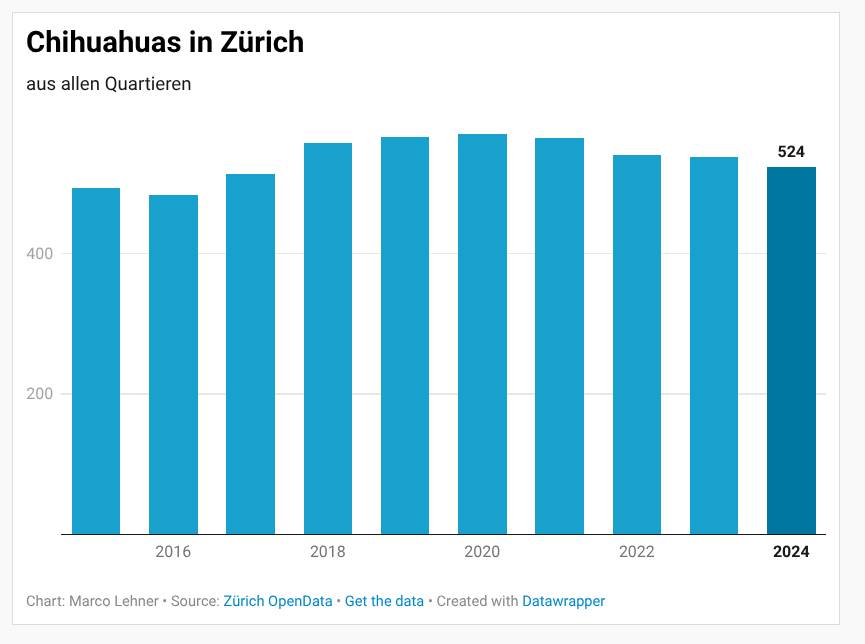